In [1]:
#importing libraries for model building
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [3]:
# Get a list of student files
student_file = [file for file in os.listdir() if file.endswith('.txt')]

# Read the content of each student's file
student_docs = [open(file).read() for file in student_file]

# Print the list of student files and their content
for filename, document in zip(student_file, student_docs):
	print(f"File: {filename}")
	print("Content:")
	print(document)
	print("-" * 30) # Separator between documents


File: fatma.txt
Content:
Life is all about doing your best in trying to
find what works out for you and taking most time in
trying to pursue those skills 
------------------------------
File: juma.txt
Content:
Life to me is about finding money and use it on things that makes you happy
coz this life is kinda short 
------------------------------
File: john.txt
Content:
Life is all about finding money and spending on luxury stuffs
Coz this life is kinda short , trust 
------------------------------


In [6]:
# Function to create TF-IDF vectors from a list of documents
def create_tfidf_vectors(docs):
    return TfidfVectorizer().fit_transform(docs).toarray()

In [7]:
# Function to calculate cosine similarity between two document vectors
def calc_cosine_similarity(vector1, vector2):
    return cosine_similarity([vector1, vector2])

In [8]:
# Create TF-IDF vectors for the student documents
doc_vec = create_tfidf_vectors(student_docs)
# Pair each document with its corresponding filename
doc_filename_pairs = list(zip(student_file, doc_vec))

In [9]:
# Function to check for plagiarism
def find_plagiarism():
	# Initialize an empty set to store plagiarism results
	plagiarism_results = set()

	# Access the global variable doc_filename_pairs
	global doc_filename_pairs

	# Iterate through each student's file and vector
	for student_a_file, student_a_vec in doc_filename_pairs:
		# Create a copy of the document-filename pairs for iteration
		remaining_pairs = doc_filename_pairs.copy()

		# Find the index of the current document-filename pair
		current_index = remaining_pairs.index((student_a_file, student_a_vec))

		# Remove the current pair from the remaining pairs
		del remaining_pairs[current_index]

		# Iterate through the remaining pairs to compare with other students
		for student_b_file, student_b_vec in remaining_pairs:
			# Calculate the cosine similarity between student_a_vec and student_b_vec
			similarity_score = calc_cosine_similarity(
				student_a_vec, student_b_vec)[0][1]

			# Sort the filenames to maintain consistency in results
			sorted_filenames = sorted((student_a_file, student_b_file))

			# Create a plagiarism result tuple with sorted filenames and similarity score
			plagiarism_result = (
				sorted_filenames[0], sorted_filenames[1], similarity_score)

			# Add the result to the plagiarism_results set
			plagiarism_results.add(plagiarism_result)

	# Return the set of plagiarism results
	return plagiarism_results


# Print plagiarism results
plagiarism_results = find_plagiarism()
for result in plagiarism_results:
	print(result)

('fatma.txt', 'juma.txt', np.float64(0.1864344837032336))
('john.txt', 'juma.txt', np.float64(0.5465972177348937))
('fatma.txt', 'john.txt', np.float64(0.14806887549598566))


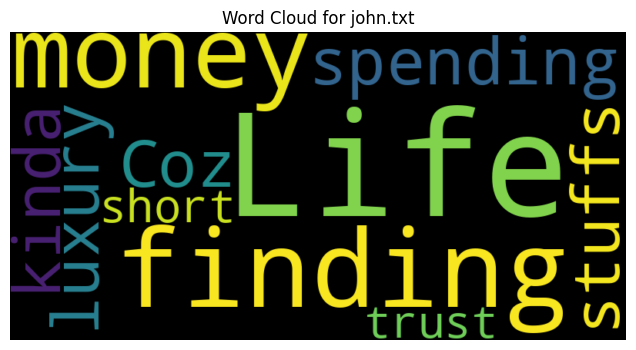

In [10]:
# Function to generate a word cloud for a document
def generate_word_cloud(document_text, filename):
	# Create a word cloud from the document text
	wordcloud = WordCloud(width=800, height=400).generate(document_text)

	# Create a figure to display the word cloud
	plt.figure(figsize=(8, 4))

	# Display the word cloud as an image with bilinear interpolation
	plt.imshow(wordcloud, interpolation='bilinear')

	# Set the title of the word cloud figure to include the filename
	plt.title(f'Word Cloud for {filename}')

	# Turn off axis labels and ticks
	plt.axis('off')

	# Show the word cloud visualization
	plt.show()


# Find plagiarism among student documents and store the results
plagiarism_results = find_plagiarism()

# Iterate through plagiarism results
for result in plagiarism_results:
	# Check if the similarity score is greater than or equal to 0.5 (adjust as needed)
	if result[2] >= 0.5:
		# Generate and display a word cloud for the document with similarity above the threshold
		generate_word_cloud(open(result[0]).read(), result[0])

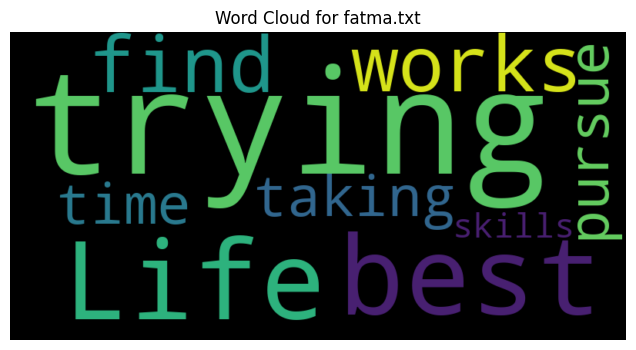

In [ ]:
# Specify the target document filename
target_document = "fatma.txt"

# Iterate through pairs of filenames and document vectors
for filename, document_vector in doc_filename_pairs:
	# Check if the current filename matches the target_document
	if filename == target_document:
		# Generate a word cloud for the target document
		generate_word_cloud(open(filename).read(), filename)

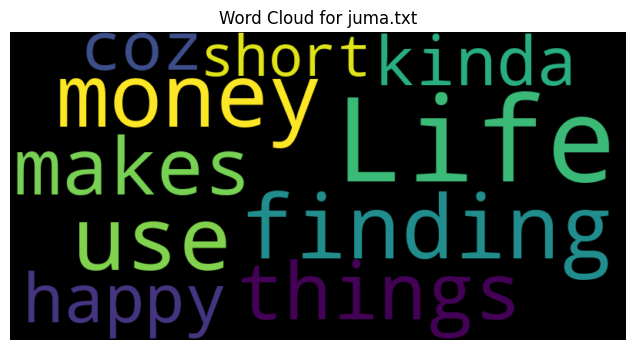

In [11]:
# Specify the target document filename
target_document = "juma.txt"

# Iterate through pairs of filenames and document vectors
for filename, document_vector in doc_filename_pairs:
	# Check if the current filename matches the target_document
	if filename == target_document:
		# Generate a word cloud for the target document
		generate_word_cloud(open(filename).read(), filename)